In [1]:
import pandas as pd, numpy as np, os

os.chdir('data')

filename = 'weatherAUS.csv'
data = pd.read_csv(filename, sep=',')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [3]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df = data.copy()
df['Month'] = pd.DatetimeIndex(df['Date']).month
# df['Date'] = df.loc[:,'Date'][-4:-2]
df = df.drop(['Date'], axis=1)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,12
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,12
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,12
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,12
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

In [6]:
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

mask = df.dtypes == np.object
# df_obj = df[object_cols]
object_cols = df.columns[mask]
object_cols

df[object_cols].describe()
# mask = data.dtypes == np.float
# float_cols = data.columns[mask]
# sns.pairplot(df, plot_kws=dict(alpha=.1, edgecolor='none'))

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,135134,134894,141232,142199,142193
unique,49,16,16,16,2,2
top,Canberra,W,N,SE,No,No
freq,3436,9915,11758,10838,110319,110316


In [7]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,12
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,12
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,12
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,12
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,6
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,6
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,6
145458,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No,6


In [8]:
df['WindDir9am'].value_counts()

N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64

In [9]:
object_cols = object_cols.tolist()
# object_cols.remove('RainTomorrow')

In [10]:
df2 = df.dropna()

In [11]:
df2 = df2.reset_index()

In [12]:
df2 = df2.drop(columns=['index'])
df2

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No,1
1,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No,1
2,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No,1
3,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No,1
4,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,...,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,NE,...,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No,6
56416,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,SE,...,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No,6
56417,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,W,...,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No,6
56418,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,NNW,...,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No,6


In [13]:
wmask = df2['WindGustDir'] == np.nan
type(df['WindGustDir'].iloc[5])
df2[wmask]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month


In [14]:
le = LabelEncoder()
for col in object_cols:
#     df2[col].replace(np.nan, "", inplace=True)
    df2[col] = le.fit_transform(df2[col])
df2

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,4,17.9,35.2,0.0,12.0,12.3,11,48.0,1,12,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0,1
1,4,18.4,28.9,0.0,14.8,13.0,8,37.0,10,10,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0,1
2,4,19.4,37.6,0.0,10.8,10.6,5,46.0,5,6,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0,1
3,4,21.9,38.4,0.0,11.4,12.2,14,31.0,14,15,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0,1
4,4,24.2,41.0,0.0,11.2,8.4,14,35.0,7,14,...,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,6,19.3,33.4,0.0,6.0,11.0,1,35.0,9,4,...,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0,0,6
56416,6,21.2,32.6,0.0,7.6,8.6,0,37.0,9,9,...,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0,0,6
56417,6,20.7,32.8,0.0,5.6,11.0,0,33.0,0,13,...,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0,0,6
56418,6,19.5,31.8,0.0,6.2,10.6,2,26.0,9,6,...,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0,0,6


In [15]:
df2['RainTomorrow'].value_counts(normalize=True)

0    0.779741
1    0.220259
Name: RainTomorrow, dtype: float64

In [16]:
df2_corr = df2.corr()
df2_corr.shape
df2_corr

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
Location,1.000000,-0.155954,-0.147500,-0.043314,-0.011509,-0.033941,0.099918,0.085603,-0.033247,0.085732,...,0.026147,0.088567,0.120987,0.018257,0.010527,-0.194449,-0.148955,-0.006037,-0.005100,-0.010701
MinTemp,-0.155954,1.000000,0.749687,0.110800,0.506764,0.076087,-0.190554,0.118054,-0.058310,-0.194123,...,0.070827,-0.475661,-0.495577,0.106177,0.042173,0.906295,0.727222,0.048953,0.087428,-0.191405
MaxTemp,-0.147500,0.749687,1.000000,-0.069981,0.650964,0.463913,-0.244508,0.035531,-0.246043,-0.200750,...,-0.448116,-0.350980,-0.451691,-0.263634,-0.257752,0.893387,0.984841,-0.221810,-0.147467,-0.160873
Rainfall,-0.043314,0.110800,-0.069981,1.000000,-0.077239,-0.246379,0.067350,0.106308,0.098980,0.059229,...,0.277625,-0.180606,-0.137302,0.217169,0.191433,0.013713,-0.074627,0.550515,0.254342,-0.033498
Evaporation,-0.011509,0.506764,0.650964,-0.077239,1.000000,0.369250,-0.104656,0.209566,-0.130683,-0.072357,...,-0.422436,-0.297319,-0.325954,-0.199809,-0.202366,0.593122,0.630727,-0.218079,-0.130002,-0.045118
Sunshine,-0.033941,0.076087,0.463913,-0.246379,0.369250,1.000000,-0.087355,-0.052422,-0.108689,-0.050795,...,-0.629299,0.043330,-0.020632,-0.677939,-0.702022,0.289038,0.486129,-0.328904,-0.453407,0.030539
WindGustDir,0.099918,-0.190554,-0.244508,0.067350,-0.104656,-0.087355,1.000000,0.119678,0.430859,0.619892,...,0.053719,-0.118875,-0.022979,0.078431,0.079285,-0.233490,-0.258929,0.148775,0.061751,0.031925
WindGustSpeed,0.085603,0.118054,0.035531,0.106308,0.209566,-0.052422,0.119678,1.000000,0.023396,0.113687,...,-0.042653,-0.430363,-0.383683,0.088129,0.131590,0.085520,-0.000382,0.146276,0.233158,0.043544
WindDir9am,-0.033247,-0.058310,-0.246043,0.098980,-0.130683,-0.108689,0.430859,0.023396,1.000000,0.320818,...,0.189645,-0.034289,0.060506,0.115243,0.069308,-0.152185,-0.252951,0.181461,0.035992,0.009012
WindDir3pm,0.085732,-0.194123,-0.200750,0.059229,-0.072357,-0.050795,0.619892,0.113687,0.320818,1.000000,...,-0.004667,-0.120668,-0.021374,0.049014,0.057746,-0.212512,-0.214044,0.128209,0.032203,0.021761


In [17]:
del_cols = [x for x in df2_corr.columns if x != 'RainTomorrow']
del_cols
df2_corr = df2_corr.drop(columns=del_cols)

In [18]:
df2_corr.sort_values(by=['RainTomorrow'], ascending=False)



,RainTomorrow
RainTomorrow,1.000000
Humidity3pm,0.455358
Cloud3pm,0.388574
Cloud9am,0.323972
RainToday,0.309098
Humidity9am,0.271033
Rainfall,0.254342
WindGustSpeed,0.233158
WindSpeed3pm,0.088862
MinTemp,0.087428


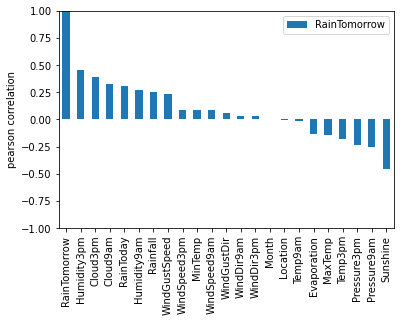

In [53]:
ax = df2_corr.sort_values(by=['RainTomorrow'], ascending=False).plot(kind='bar')
ax.set(ylim=[-1, 1], ylabel='pearson correlation');

In [19]:
# df2_corr.abs().sort_values(by=['RainTomorrow'], ascending=False)

In [20]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Location,56420.0,12.628837,7.301231,0.0,7.0,13.0,19.0,25.0
MinTemp,56420.0,13.464770,6.416689,-6.7,8.6,13.2,18.4,31.4
MaxTemp,56420.0,24.219206,6.970676,4.1,18.7,23.9,29.7,48.1
Rainfall,56420.0,2.130397,7.014822,0.0,0.0,0.0,0.6,206.2
Evaporation,56420.0,5.503135,3.696282,0.0,2.8,5.0,7.4,81.2
Sunshine,56420.0,7.735626,3.758153,0.0,5.0,8.6,10.7,14.5
WindGustDir,56420.0,7.485537,4.792305,0.0,3.0,8.0,12.0,15.0
WindGustSpeed,56420.0,40.877366,13.335232,9.0,31.0,39.0,48.0,124.0
WindDir9am,56420.0,7.122935,4.660823,0.0,3.0,7.0,11.0,15.0
WindDir3pm,56420.0,7.574424,4.711700,0.0,3.0,8.0,12.0,15.0


In [26]:
from sklearn.preprocessing import MinMaxScaler

mask = [x for x in df2.columns if (x != 'RainToday')]
mask.remove('RainTomorrow')

mm = MinMaxScaler()

df2[mask] = mm.fit_transform(df2[mask])

In [27]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Location,56420.0,0.505153,0.292049,0.0,0.280000,0.520000,0.760000,1.0
MinTemp,56420.0,0.529259,0.168417,0.0,0.401575,0.522310,0.658793,1.0
MaxTemp,56420.0,0.457255,0.158424,0.0,0.331818,0.450000,0.581818,1.0
Rainfall,56420.0,0.010332,0.034020,0.0,0.000000,0.000000,0.002910,1.0
Evaporation,56420.0,0.067773,0.045521,0.0,0.034483,0.061576,0.091133,1.0
Sunshine,56420.0,0.533491,0.259183,0.0,0.344828,0.593103,0.737931,1.0
WindGustDir,56420.0,0.499036,0.319487,0.0,0.200000,0.533333,0.800000,1.0
WindGustSpeed,56420.0,0.277194,0.115959,0.0,0.191304,0.260870,0.339130,1.0
WindDir9am,56420.0,0.474862,0.310722,0.0,0.200000,0.466667,0.733333,1.0
WindDir3pm,56420.0,0.504962,0.314113,0.0,0.200000,0.533333,0.800000,1.0


In [28]:
mask.append('RainToday')
mask

['Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Month',
 'RainToday']

In [29]:
X = df2[mask]
y = df2['RainTomorrow']

In [31]:
X
y

0        0
1        0
2        0
3        0
4        0
        ..
56415    0
56416    0
56417    0
56418    0
56419    0
Name: RainTomorrow, Length: 56420, dtype: int32

In [44]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_shuf_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(X, y))

X_train = df2.loc[train_idx, mask]
y_train = df2.loc[train_idx, 'RainTomorrow']

X_test = df2.loc[test_idx, mask]
y_test = df2.loc[test_idx, 'RainTomorrow']

In [58]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

In [59]:
lr_l1_pred = lr_l1.predict(X_test)

In [104]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

precision, recall, fscore, _ = score(y_test, lr_l1_pred, average='weighted')
accuracy = accuracy_score(y_test, lr_l1_pred)
auc = roc_auc_score(y_test, lr_l1_pred)
metrics.append(pd.Series({'precision':precision, 'recall':recall, 'fscore': fscore,
                             'accuracy':accuracy, 'auc':auc}, name='lr_l1'))
cm['lr_l1'] = confusion_matrix(y_test, lr_l1_pred)

In [105]:
metrics = pd.concat(metrics, axis=1)

In [106]:
metrics

,lr_l1
precision,0.846639
recall,0.855134
fscore,0.846787
accuracy,0.855134
auc,0.742063


In [107]:
cm_f1 = f1_score(y_test, lr_l1_pred, average='weighted')
cm_f1

0.8467865648829838

In [108]:
cm['lr_l1']

array([[12461,   737],
       [ 1715,  2013]], dtype=int64)

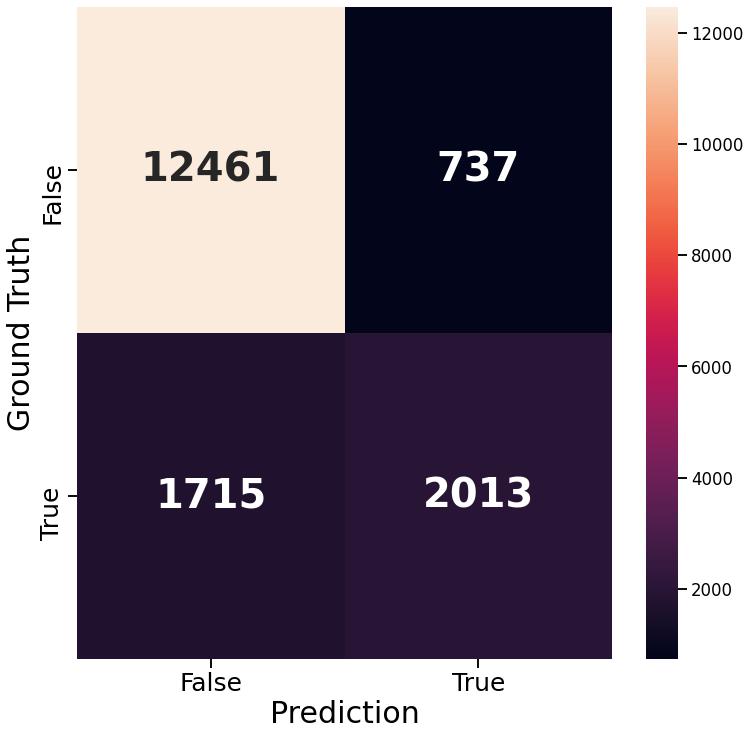

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
from datasetup import churndata, colors, labels, palette

sns.set_context('talk')
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(cm['lr_l1'], annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})

labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels, fontsize=25);
ax.set_ylabel('Ground Truth', fontsize=30);
ax.set_xlabel('Prediction', fontsize=30);

In [109]:
from sklearn.kernel_approximation import Nystroem
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

kwargs = {'kernel': 'rbf'}
svc = SVC(**kwargs)
nystroem = Nystroem(**kwargs)
sgd = SGDClassifier()

In [110]:
X_transformed = nystroem.fit_transform(X_train)
sgd.fit(X_transformed, y_train)

SGDClassifier()

In [111]:
X_test_transformed = nystroem.fit_transform(X_test)
sgd_pred = sgd.predict(X_test_transformed)

In [123]:
metrics = list()
cm = dict()

precision, recall, fscore, _ = score(y_test, sgd_pred, average='weighted')
accuracy = accuracy_score(y_test, sgd_pred)
auc = roc_auc_score(y_test, sgd_pred)
metrics.append(pd.Series({'precision':precision, 'recall':recall, 'fscore': fscore,
                             'accuracy':accuracy, 'auc':auc}, name='SGD'))
cm['stochastic_gradient_descent'] = confusion_matrix(y_test, sgd_pred)

In [124]:
metrics = pd.concat(metrics, axis=1)
metrics

,SGD
precision,0.704467
recall,0.767577
fscore,0.711760
accuracy,0.767577
auc,0.530883


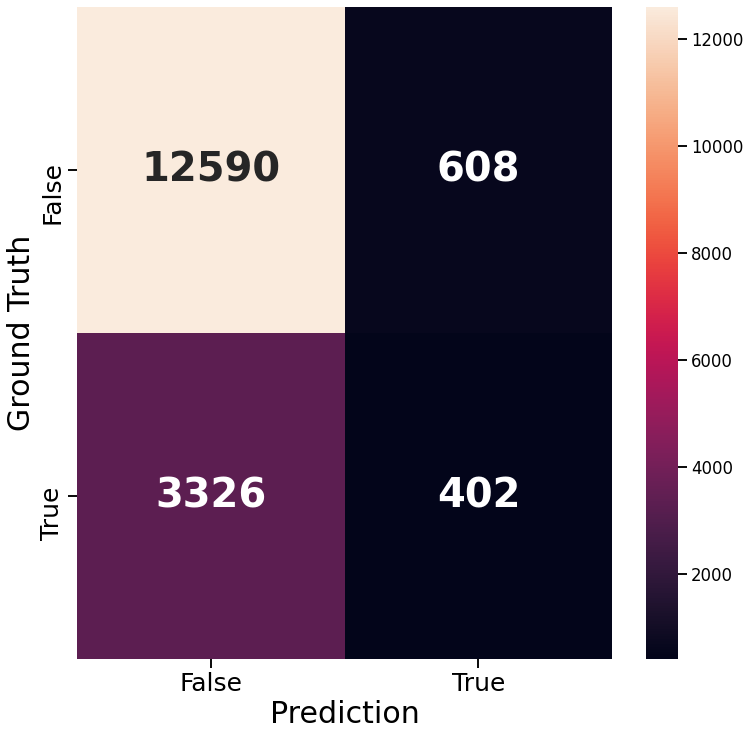

In [121]:
sns.set_context('talk')
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(cm['stochastic_gradient_descent'], annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})

labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels, fontsize=25);
ax.set_ylabel('Ground Truth', fontsize=30);
ax.set_xlabel('Prediction', fontsize=30);

In [125]:
def plot_decision_boundary(estimator, X, y):
    estimator.fit(X, y)
    X_color = X.sample(300)
    y_color = y.loc[X_color.index]
    y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')
    x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
    xx, yy = np.meshgrid(x_axis, y_axis)
    xx_ravel = xx.ravel()
    yy_ravel = yy.ravel()
    X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
    y_grid_predictions = estimator.predict(X_grid)
    y_grid_predictions = y_grid_predictions.reshape(xx.shape)

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
    ax.scatter(X_color.iloc[:, 0], X_color.iloc[:, 1], color=y_color, alpha=1)
    ax.set(
        xlabel=fields[0],
        ylabel=fields[1],
        title=str(estimator))

In [129]:
SVC_Gaussian = SVC(kernel='rbf')
SVC_Gaussian.fit(X_train, y_train)

SVC()

In [131]:
# plot_decision_boundary(SVC_Gaussian, X_train, y_train)

In [138]:
SVC_Gaussian_pred = SVC_Gaussian.predict(X_test)

metrics = list()
cm = dict()

precision, recall, fscore, _ = score(y_test, SVC_Gaussian_pred, average='weighted')
accuracy = accuracy_score(y_test, SVC_Gaussian_pred)
auc = roc_auc_score(y_test, SVC_Gaussian_pred)
metrics.append(pd.Series({'precision':precision, 'recall':recall, 'fscore': fscore,
                             'accuracy':accuracy, 'auc':auc}, name='SVC_Gaussian'))
cm['SVC_Gaussian'] = confusion_matrix(y_test, SVC_Gaussian_pred)

In [139]:
metrics = pd.concat(metrics, axis=1)
metrics

,SVC_Gaussian
precision,0.851643
recall,0.858738
fscore,0.846359
accuracy,0.858738
auc,0.728591


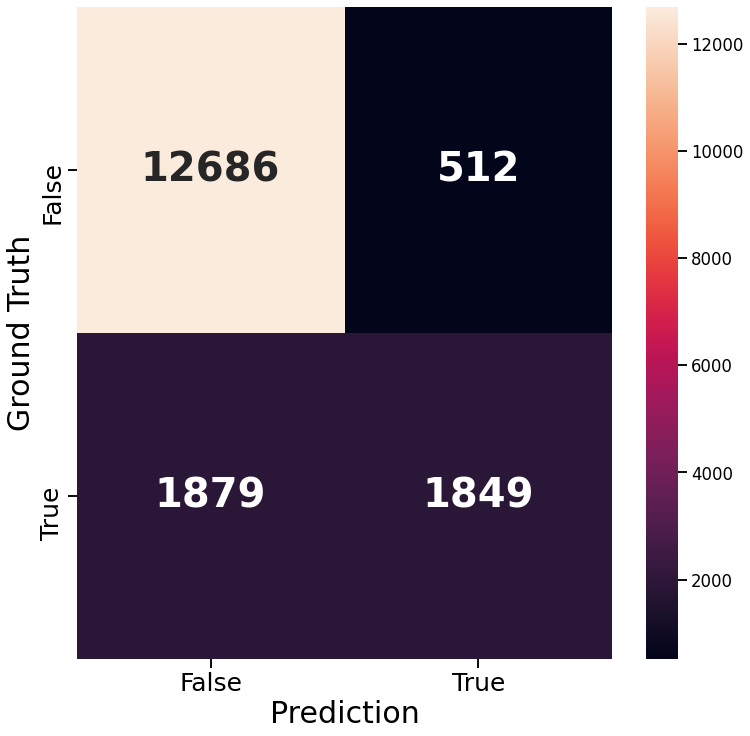

In [140]:
sns.set_context('talk')
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(cm['SVC_Gaussian'], annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})

labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels, fontsize=25);
ax.set_ylabel('Ground Truth', fontsize=30);
ax.set_xlabel('Prediction', fontsize=30);

In [141]:
from sklearn.ensemble import RandomForestClassifier

In [144]:
# Suppress warnings about too few trees from the early models
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.162506
20.0,0.157112
30.0,0.150479
40.0,0.147111
50.0,0.144908
100.0,0.139262
150.0,0.138730
200.0,0.138072
300.0,0.137439


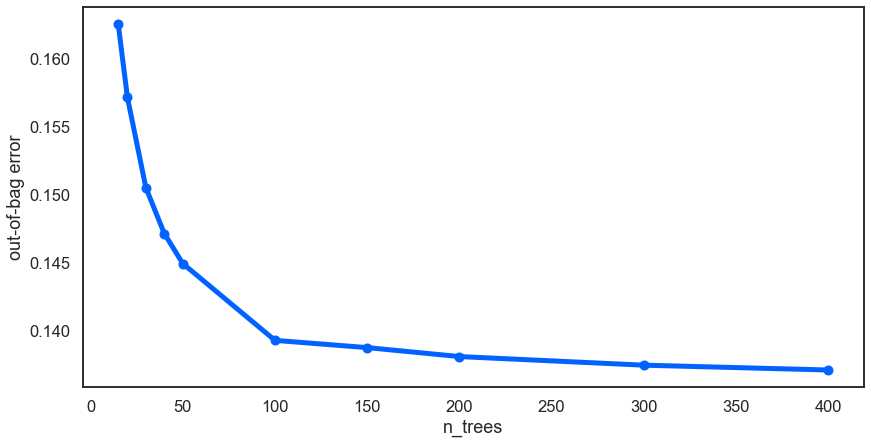

In [145]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [146]:
RF.set_params(n_estimators=400)
# Fit the model
RF.fit(X_train, y_train)
RF_pred = RF.predict(X_test)

metrics = list()
cm = dict()

precision, recall, fscore, _ = score(y_test, RF_pred, average='weighted')
accuracy = accuracy_score(y_test, RF_pred)
auc = roc_auc_score(y_test, RF_pred)
metrics.append(pd.Series({'precision':precision, 'recall':recall, 'fscore': fscore,
                             'accuracy':accuracy, 'auc':auc}, name='Random_Forest'))
metrics = pd.concat(metrics, axis=1)
cm['Random_Forest'] = confusion_matrix(y_test, RF_pred)

In [147]:
metrics

,Random_Forest
precision,0.857217
recall,0.864233
fscore,0.854873
accuracy,0.864233
auc,0.747897


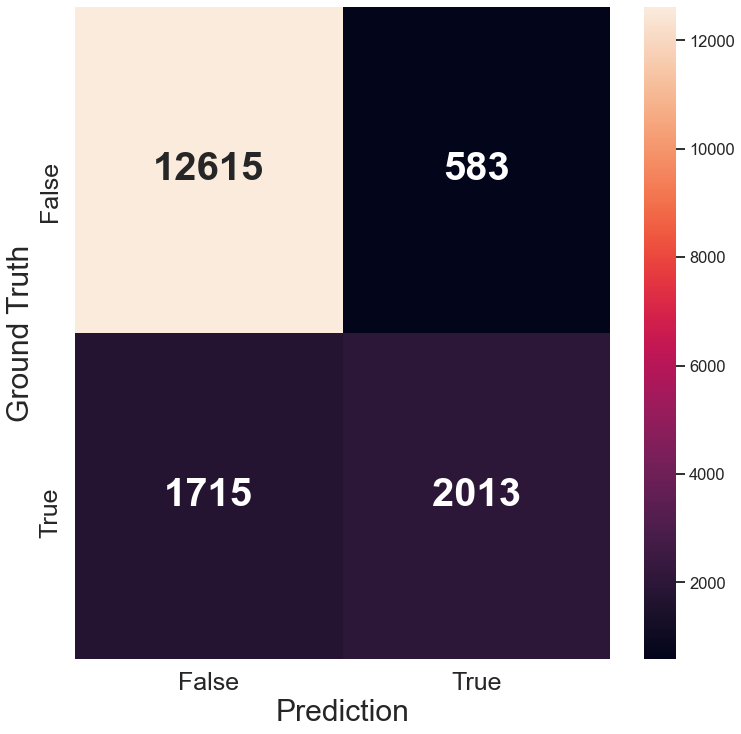

In [148]:
sns.set_context('talk')
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(cm['Random_Forest'], annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})

labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels, fontsize=25);
ax.set_ylabel('Ground Truth', fontsize=30);
ax.set_xlabel('Prediction', fontsize=30);

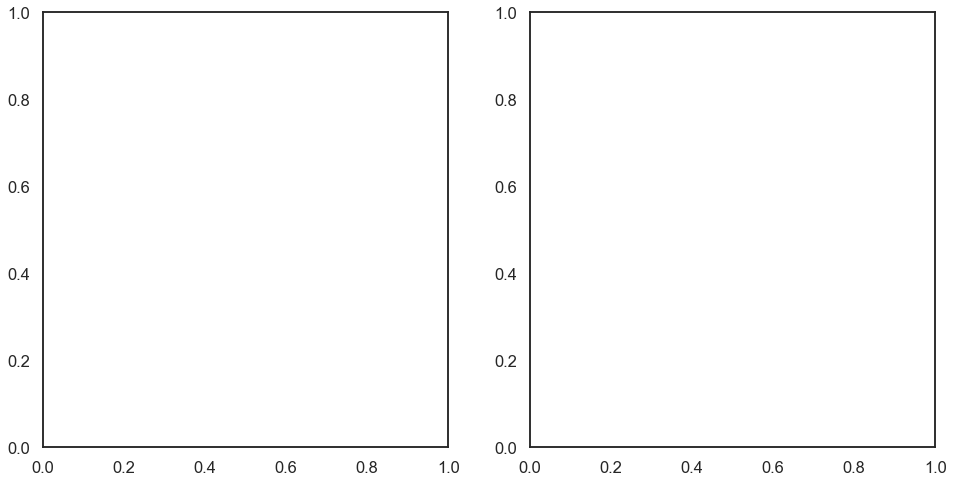

In [169]:
from sklearn.metrics import roc_curve,  precision_recall_curve
sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)

# Get the probabilities for each of the two categories
y_prob = RF.predict_proba(X_test)

In [170]:
y_prob

array([[0.86  , 0.14  ],
       [0.925 , 0.075 ],
       [0.875 , 0.125 ],
       ...,
       [0.73  , 0.27  ],
       [0.25  , 0.75  ],
       [0.8475, 0.1525]])

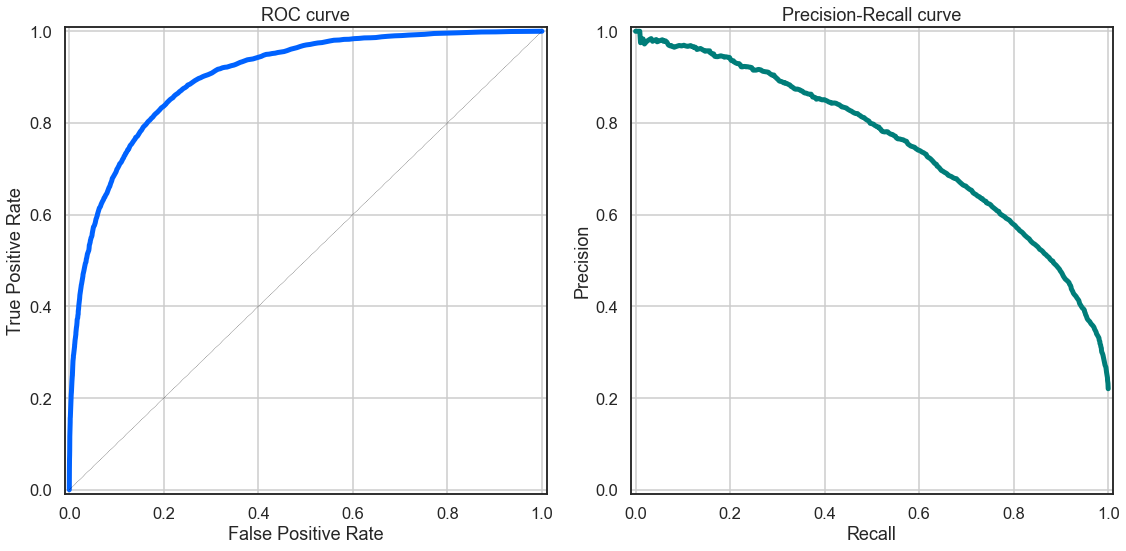

In [176]:
sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)

# Get the probabilities for each of the two categories
y_prob = RF.predict_proba(X_test)

# Plot the ROC-AUC curve
ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
ax.plot(fpr, tpr, color=colors[0], linewidth=5)
# It is customary to draw a diagonal dotted line in ROC plots.
# This is to indicate completely random prediction. Deviation from this
# dotted line towards the upper left corner signifies the power of the model.
ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)

# Plot the precision-recall curve
ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test, y_prob[:,1])
ax.plot(recall, precision, color=colors[1], linewidth=5)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)

plt.tight_layout()

In [159]:
feature_cols = [x for x in df2.columns if x not in 'RainTomorrow']

In [150]:
RF.feature_importances_

array([0.02867111, 0.03953298, 0.0376133 , 0.04468609, 0.0351909 ,
       0.10753198, 0.02507376, 0.05273045, 0.02632991, 0.02572502,
       0.02857082, 0.02950338, 0.04531505, 0.15351791, 0.05489592,
       0.0631392 , 0.0279449 , 0.05290447, 0.03814287, 0.03983992,
       0.02262639, 0.02051368])

In [160]:
feature_imp = pd.Series(RF.feature_importances_, index=feature_cols).sort_values(ascending=False)

In [161]:
feature_imp

Humidity3pm      0.153518
Sunshine         0.107532
Pressure3pm      0.063139
Pressure9am      0.054896
Cloud3pm         0.052904
WindGustSpeed    0.052730
Humidity9am      0.045315
Rainfall         0.044686
Temp3pm          0.039840
MinTemp          0.039533
Temp9am          0.038143
MaxTemp          0.037613
Evaporation      0.035191
WindSpeed3pm     0.029503
Location         0.028671
WindSpeed9am     0.028571
Cloud9am         0.027945
WindDir9am       0.026330
WindDir3pm       0.025725
WindGustDir      0.025074
RainToday        0.022626
Month            0.020514
dtype: float64

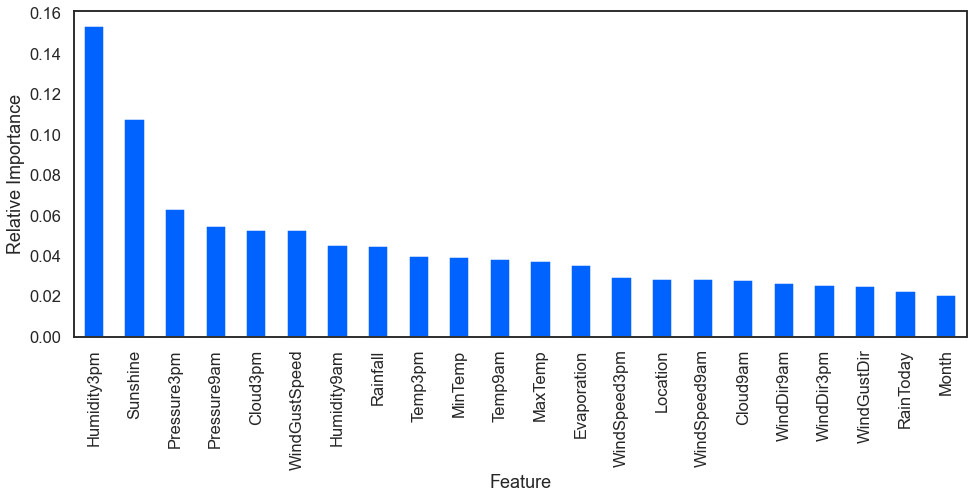

In [162]:
ax = feature_imp.plot(kind='bar', figsize=(16, 6))
ax.set(ylabel='Relative Importance');
ax.set(xlabel='Feature');

In [ ]:
# Way to calculate weighted f1-score, precision, and recall
# https://www.programmersought.com/article/81125226396/ 